# TRABALHO 3 DE CÁLCULO NUMÉRICO

# Alunos: Pedro Machado, João Centenaro e Alex Lima

## Questão 1:
x = {0,15 |0,17 |0,19 |0,21 |0,23 |0,25 |0,27 |0,29 |0,31}

f(x) = {0,1761 |0,2304 |0,2788 |0,3222 |0,3617 |0,3979 |0,4314 |0,4624 |0,4914}

a) Utilizando a Forma de Lagrange para interpolar todos os pontos tabelados e fazer uma estimativa para f(0,20) e f(0,22)
b) Plotar o gráfico do polinômio obtido

Pela Forma de Lagrange, temos que $P(x) = y_0 l_0(x) + y_1 l_1(x) + y_2 l_2(x) + y_3 l_3(x) + y_4 l_4(x) + y_5 l_5(x) + y_6 l_6(x) + y_7 l_7(x) + y_8 l_8(x)$

Assim, montamos um programa em Python para calcular nosso polinômio e achar os pontos:

P( 0.2 ) 0.30103611755371096
P( 0.22 ) 0.34239778747558597


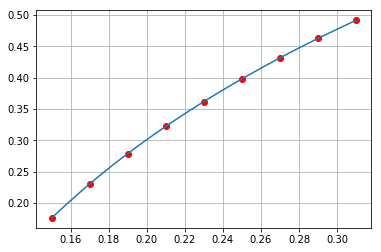

In [7]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

X = [0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27, 0.29, 0.31]
Y = [0.1761, 0.2304, 0.2788, 0.3222, 0.3617, 0.3979, 0.4314, 0.4624, 0.4914]


def calcP(x):
    valor = 0
    for k in range(len(Y)):
        lk = 1.0
        for i in range(len(X)):
            if k != i:
                lk = lk*(x - X[i])/(X[k]-X[i])
        valor = valor +Y[k]*lk 
    return valor

print ("P(",0.20,")", calcP(0.20))
print ("P(",0.22,")", calcP(0.22))


Xplot = []
Yplot = []
n = 20              
dx = (X[-1]-X[0])/n 
 
for i in range(n+1):
    x = X[0] + i*dx
    y = calcP(x)
    Xplot.append(x)
    Yplot.append(y)


plt.plot(X, Y, "ro")  
plt.plot(Xplot, Yplot, "-") 
plt.grid(True) 
plt.show()

c) A questão pede um polinômio de grau 3, logo temos que usar n+1 termos, que é 4. Assim, podemos repetir o código anterior para 4 termos equidistantes, ao invés dos 9 dados:

P( 0.2 ) 0.30095078124999997
P( 0.22 ) 0.34244296875


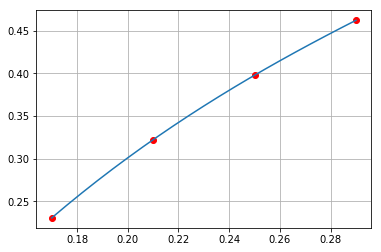

In [159]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

X = [0.17, 0.21, 0.25, 0.29]
Y = [0.2304, 0.3222, 0.3979, 0.4624]


def calcP(x):
    valor = 0
    for k in range(len(Y)):
        lk = 1.0
        for i in range(len(X)):
            if k != i:
                lk = lk*(x - X[i])/(X[k]-X[i])
        valor = valor +Y[k]*lk 
    return valor

print ("P(",0.20,")", calcP(0.20))
print ("P(",0.22,")", calcP(0.22))


Xplot = []
Yplot = []
n = 20              
dx = (X[-1]-X[0])/n 
 
for i in range(n+1):
    x = X[0] + i*dx
    y = calcP(x)
    Xplot.append(x)
    Yplot.append(y)


plt.plot(X, Y, "ro")  
plt.plot(Xplot, Yplot, "-") 
plt.grid(True) 
plt.show()

Assim, pelo gráfico, podemos notar que a curva é semelhante a da letra b), porém os valores dos pontos são menos aproximados, devido ao menor número de ponto avaliados para a interpolação

d) Para a Fórmula de Newton, usaremos as diferenças divididas, dadas pela forma:
$$f[x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8]= \frac{f[x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8] - f[x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7]}{x_8 - x_0} $$

Assim, montamos o programa:

P( 0.2 ) 0.30103611755371096
P( 0.22 ) 0.342397787475586


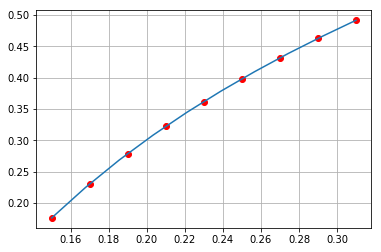

In [60]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Definindo a lista de pontos a serem interpolados
X  = [0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27, 0.29, 0.31]
Y  = [0.1761, 0.2304, 0.2788, 0.3222, 0.3617, 0.3979, 0.4314, 0.4624, 0.4914]    
dd = []  #dd sendo as diferenças divididas  




dd.append(Y) 
     


for ordem in range(1, len(X), 1):
    dd.append([])   
    
    
    for k in range(0, len(X)-ordem, 1): 
         
        valor = (dd[ordem-1][k+1]-dd[ordem-1][k])/(X[k+ordem]-X[k])    
               
        dd[ordem].append(valor)
    


def produtorio(x,n):
    prod = 1.
    for i in range(n):
        prod = prod * (x-X[i])
    return prod


def calculaP(x):
    soma = dd[0][0]
    for i in range(1,len(X)):
        soma = soma + produtorio(x,i)*dd[i][0]
    return soma

print ("P(",0.20,")", calculaP(0.20))
print ("P(",0.22,")", calculaP(0.22))

Xp = np.linspace(X[0], X[-1], num=10) 
Yp = []
for x in Xp:
    y = calculaP(x)
    Yp.append(y)

    
plt.plot(X, Y, 'ro', Xp, Yp,'-', )
plt.grid()
plt.show()

## Questão 2

θ = {50 |52 |54 |56 |58 |60}
f(θ) = {2,75 |1,45 |0,50 |0,15 |0,20 |0,85}

Como a questão pede para encontrar um polinômio de grau 2, temos que escolher três pontos e aplicar o minimos quadrados:


F(X) = 6.13839286(10^-2))x^2 -6.94651786x + 1.96639286(10^2)


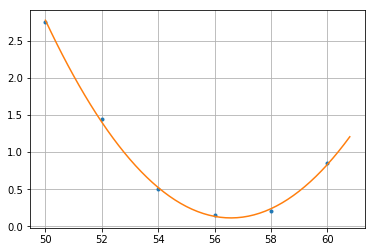

In [161]:

import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt

X= np.array([50.0, 52.0 ,54.0 ,56.0 ,58.0 ,60.0])
Y= np.array([2.75 ,1.45 ,0.50 ,0.15 ,0.20, 0.85])


# Calcula os elementos das marizes
A11 = np.sum(X**4)
A12 = np.sum(X**3)
A13 = np.sum(X**2)
A21 = A12
A22 = np.sum(X**2)
A23 = np.sum(X**1)
A31 = A13
A32 = A23
A33 = 6
B1 = np.sum(X**2*Y)
B2 = np.sum(X*Y)
B3 = np.sum(Y)

# Monta e resolve o sistema
A = np.array([[A11,A12,A13],[A21, A22, A23],[A31,A32,A33]])
B = np.array([[B1],[B2],[B3]])
a = solve(A, B)

# define a funcao g(x) para plotar 
g = lambda x: 6.13839286*(10**(-2))*x**2 -6.94651786*x + 1.96639286*(10**(2))

# cria pontos (x, y) da reta 
Xr = np.arange(X[0], X[-1]+1, 0.2)
Yr = []
for x in Xr:
    Yr.append(g(x))    
print("F(X) = 6.13839286(10^-2))x^2 -6.94651786x + 1.96639286(10^2)")
# Plota os pontos e a reta
plt.plot(X, Y, ".", Xr, Yr, "-") 
plt.grid()
plt.show()

Agora, para determinar o mínimo, derivamos o polinômio e igualamos a 0:
P(x) = 12.28*10(-2)x - 6,9465 = 0
x = 56,57

In [162]:
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt

x = 56.57

g = lambda x: 6.13839286*(10**(-2))*x**2 -6.94651786*x + 1.96639286*(10**(2))
print("O valor de Fb é:",g(x))


O valor de Fb é: 0.11346438962613092


## Questão 3

In [171]:
% matplotlib inline
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt

X = np.array([0.002 ,0.006 ,0.012 ,0.018 ,0.024])
Y = np.array([0.287 ,0.899 ,1.915 ,3.048 ,4.299])

A11 = np.sum(X**4)
A12 = np.sum(X**3)
A13 = np.sum(X**2)
A21 = A12
A22 = np.sum(X**2)
A23 = np.sum(X**1)
A31 = A13
A32 = A23
A33 = 5
B1 = np.sum(X**2*Y)
B2 = np.sum(X*Y)
B3 = np.sum(Y)
A = np.array([[A11,A12,A13],[A21, A22, A23],[A31,A32,A33]])
B = np.array([[B1],[B2],[B3]])
a= solve(A, B)

g = lambda x: 1.63135153*(10**(3))*x**2 + 1.39944577*(10**(2))*x + 6.10226320*(10**(-4))

print(" y(x) = 1.63135153(10^3))x^2 + 1.39944577(10^2)x + 6.10226320(10^-4)")


 y(x) = 1.63135153(10^3))x^2 + 1.39944577(10^2)x + 6.10226320(10^-4)


dx/dy = 3.26270306(10^3)x + 1.39944577(10^2)

## Questão 4
a) Plotar os pontos
b) Determinar T = 7,5°C

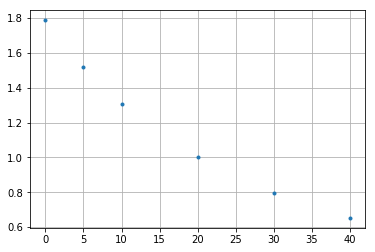

P( 7.5 ) 1.4068632289341518


In [110]:
% matplotlib inline
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt

X = [0.0, 5, 10, 20, 30, 40]

Y = [1.787, 1.519, 1.307, 1.002, 0.7975, 0.6529]


## Plota os pontos 

plt.grid()

plt.plot(X, Y, ".") 

plt.show()

def calcP(x):
    valor = 0
    for k in range(len(Y)):
        lk = 1.0
        for i in range(len(X)):
            if k != i:
                lk = lk*(x - X[i])/(X[k]-X[i])
        valor = valor +Y[k]*lk 
    return valor

print ("P(",7.5,")", calcP(7.5))




c) Calculando por regressão polinomial

[[-4.40476190e-10]
 [ 1.85297619e-07]
 [-2.24333333e-05]
 [ 1.42489881e-03]
 [-6.01865476e-02]
 [ 1.78700000e+00]]


D:\Crash\Anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.929554525557527e-17 / 1.1102230246251565e-16
  RuntimeWarning)


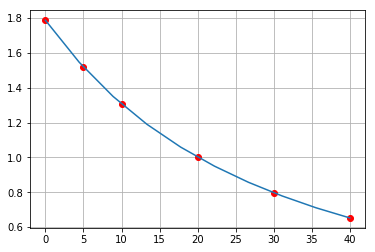

In [111]:
% matplotlib inline
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt

X = np.array([0.0, 5.0, 10.0, 20.0, 30.0, 40.0])
Y = np.array([1.787, 1.519, 1.307, 1.002, 0.7975, 0.6529])

g10 = X**10
g9 = X**9
g8 = X**8
g7 = X**7
g6 = X**6
g5 = X**5
g4 = X**4
g3 = X**3
g2 = X**2
g1 = X**1
g0 = X**0
h5 = (X**5)*Y
h4 = (X**4)*Y
h3 = (X**3)*Y
h2 = (X**2)*Y
h1 = (X**1)*Y
h0 = (X**0)*Y

a11 = np.sum(g10)
a12 = np.sum(g9)
a13 = np.sum(g8)
a14 = np.sum(g7)
a15 = np.sum(g6)
a16 = np.sum(g5)
a21 = a12
a22 = np.sum(g8)
a23 = np.sum(g7)
a24 = np.sum(g6)
a25 = np.sum(g5)
a26 = np.sum(g4)
a31 = a13
a32 = a23
a33 = np.sum(g6)
a34 = np.sum(g5)
a35 = np.sum(g4)
a36 = np.sum(g3)
a41 = a14
a42 = a24
a43 = a34
a44 = np.sum(g4)
a45 = np.sum(g3)
a46 = np.sum(g2)
a51 = a15
a52 = a25
a53 = a35
a54 = a45
a55 = np.sum(g2)
a56 = np.sum(g1)
a61 = a16
a62 = a26
a63 = a36
a64 = a46
a65 = a56
a66 = np.sum(g0)

b1 = np.sum(h5)
b2 = np.sum(h4)
b3 = np.sum(h3)
b4 = np.sum(h2)
b5 = np.sum(h1)
b6 = np.sum(h0)

A = np.array([[a11,a12, a13, a14, a15, a16],[a21, a22, a23, a24, a25, a26], [a31, a32, a33, a34, a35, a36], [a41, a42, a43, a44, a45, a46], [a51, a52, a53, a54, a55, a56], [a61, a62, a63, a64, a65, a66]])
B = np.array([[b1] , [b2],  [b3],  [b4],  [b5],  [b6]])
 


a = solve(A, B)

print(a)


i = lambda x: 1.85297619*(10**(-7))*(x**4) - 4.40476190*(10**(-10))*(x**5) - 2.24333333*(10**(-5))*(x**3) + 0.00142489881*(x**2) - 0.0601865476*x + 1.787
Xp = np.linspace(X[0], X[-1], num=10) 
Yp = []
for x in Xp:
    y = i(x)
    Yp.append(y)

    
plt.plot(X, Y, 'ro', Xp, Yp,'-', )
plt.grid()
plt.show()





## Questão 5
 

O valor de m é [4.72446756]
O valor de B é 1.4611221255378586


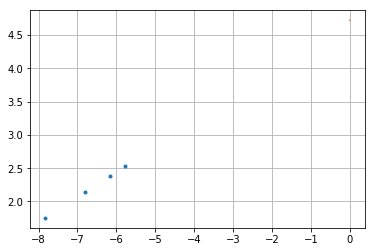

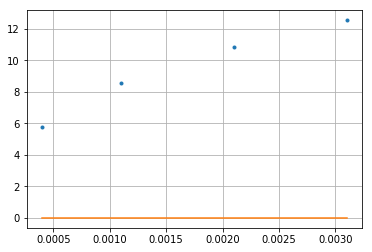

In [172]:
% matplotlib inline
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt
from scipy.integrate import quad
import math
from numpy import exp

X = np.array([0.0004, 0.0011, 0.0021, 0.0031])
Y = np.array([5.775, 8.577, 10.874, 12.555])

L = np.log(X)
K = np.log(Y)

A11 = np.sum(L**2)
A12 = np.sum(L**1)
A21 = A12
A22 = np.sum(L**0)

B1 = np.sum(L*K) 
B2 = np.sum(K)

A = np.array([[A11, A12],[A21, A22]])
C = np.array([[B1],[B2]])

a = solve(A, C)


m = a[1]
B = math.exp(a[0])

print("O valor de m é", m)
print("O valor de B é", B)

i= lambda x: 0.379*x + 4.72
Xp = np.linspace(X[0], X[-1], num=10) 
Yp = []
for x in Xp:
    y = i(x)
    Yp.append(y)

    
plt.plot(L, K, '.', Xp, Yp,'-', )
plt.grid()
plt.show()

p= lambda x: 1.46*x**(4.724)
Xp = np.linspace(X[0], X[-1], num=10) 
Yp = []
for x in Xp:
    y = p(x)
    Yp.append(y)

    
plt.plot(X, Y, '.', Xp, Yp,'-', )
plt.grid()
plt.show()



